# Sampling SDF with PyVista

In [1]:
import pyvista as pv
import vtk
import numpy as np

In [2]:
from utils import load_sample_mesh
mesh = load_sample_mesh()
mesh.plot()

Widget(value='<iframe src="http://localhost:44681/index.html?ui=P_0x7f322546bee0_0&reconnect=auto" class="pyvi…

In [3]:
resolution = 50

xmin, xmax, ymin, ymax, zmin, zmax = mesh.bounds

margin = 0.1
x_vals = np.linspace(xmin - margin, xmax + margin, resolution)
y_vals = np.linspace(ymin - margin, ymax + margin, resolution)
z_vals = np.linspace(zmin - margin, zmax + margin, resolution)

X, Y, Z = np.meshgrid(x_vals, y_vals, z_vals, indexing='ij')
grid_points = np.column_stack([X.ravel(), Y.ravel(), Z.ravel()])
# random_points = np.random.rand(resolution, resolution, resolution).ravel(order='F')
grid = pv.ImageData(dimensions=(resolution, resolution, resolution))
# grid.origin = (0.0, 0.0, 0.0)
# grid.spacing = (1.0, 1.0, 1.0)
grid.origin = (xmin, ymin, zmin)
grid.spacing = (x_vals[1] - x_vals[0], y_vals[1] - y_vals[0], z_vals[1] - z_vals[0])
grid.point_data['points'] = grid_points
grid.set_active_scalars('points')
grid.plot()

Widget(value='<iframe src="http://localhost:44681/index.html?ui=P_0x7f3283ef9030_1&reconnect=auto" class="pyvi…

In [4]:
help(grid.compute_implicit_distance)

Help on method compute_implicit_distance in module pyvista.core.filters.data_set:

compute_implicit_distance(surface, inplace=False) method of pyvista.core.grid.ImageData instance
    Compute the implicit distance from the points to a surface.
    
    This filter will compute the implicit distance from all of the
    nodes of this mesh to a given surface. This distance will be
    added as a point array called ``'implicit_distance'``.
    
    Nodes of this mesh which are interior to the input surface
    geometry have a negative distance, and nodes on the exterior
    have a positive distance. Nodes which intersect the input
    surface has a distance of zero.
    
    Parameters
    ----------
    surface : pyvista.DataSet
        The surface used to compute the distance.
    
    inplace : bool, default: False
        If ``True``, a new scalar array will be added to the
        ``point_data`` of this mesh and the modified mesh will
        be returned. Otherwise a copy of this mesh

In [5]:
# PyVista의 SDF 계산이 trimesh 보다 훨씬 빠르다
sdf_grid = grid.compute_implicit_distance(surface=mesh)
sdf_grid.set_active_scalars('implicit_distance')
sdf_grid.plot()

Widget(value='<iframe src="http://localhost:44681/index.html?ui=P_0x7f321ebc5450_2&reconnect=auto" class="pyvi…

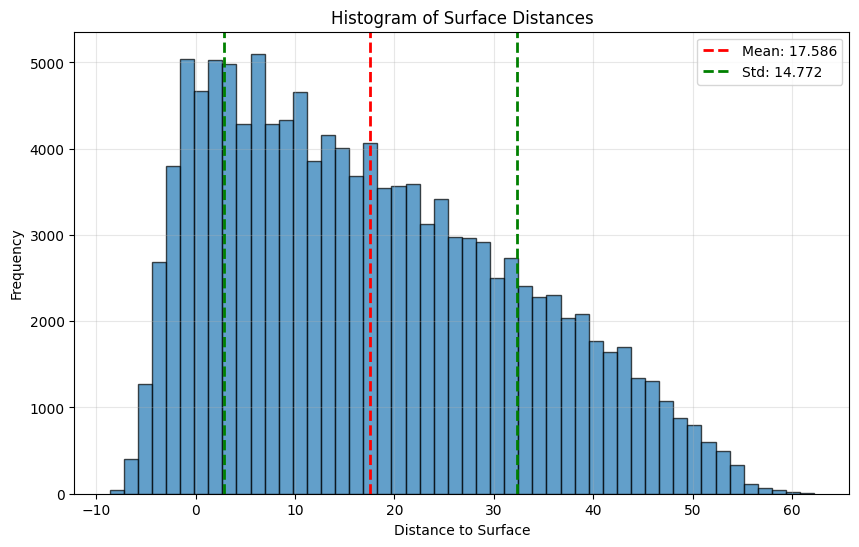

Mean distance: 17.586
Standard deviation: 14.772
Min distance: -8.664
Max distance: 62.246


In [6]:
from utils import plot_histogram
plot_histogram(sdf_grid.point_data['implicit_distance'])

In [7]:
surface = sdf_grid.contour(isosurfaces=1, scalars='implicit_distance', rng=[-0.1, 0.1], method='marching_cubes')
surface.plot()

Widget(value='<iframe src="http://localhost:44681/index.html?ui=P_0x7f31b5152ad0_3&reconnect=auto" class="pyvi…

In [8]:
help(sdf_grid.contour)

Help on method contour in module pyvista.core.filters.data_set:

contour(isosurfaces=10, scalars=None, compute_normals=False, compute_gradients=False, compute_scalars=True, rng=None, preference='point', method='contour', progress_bar=False) method of pyvista.core.grid.ImageData instance
    Contour an input self by an array.
    
    ``isosurfaces`` can be an integer specifying the number of
    isosurfaces in the data range or a sequence of values for
    explicitly setting the isosurfaces.
    
    Parameters
    ----------
    isosurfaces : int | sequence[float], optional
        Number of isosurfaces to compute across valid data range or a
        sequence of float values to explicitly use as the isosurfaces.
    
    scalars : str | array_like[float], optional
        Name or array of scalars to threshold on. If this is an array, the
        output of this filter will save them as ``"Contour Data"``.
        Defaults to currently active scalars.
    
    compute_normals : bool, de